
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignment
 - Classical Data Analysis Class with Victor F. Pajuelo Madrigal victor.pajuelo@bts.tech 
 - Analysis/Answers completed by Rima H


An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Code to avoid cell auto-scrolling

In [249]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [250]:
data = 'https://github.com/vfp1/bts-cda-2020/raw/main/Session_1/Ecommerce_Customers.csv'
customers = pd.read_csv(data)
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [251]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


### Exploratory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove those variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



## Observations:
-  "Yearly Amount Spent" is our target value. This is the value that we will need to predict based on inputs 
- Since we are looking into a linear regression, we will not look into the non numerical values email and address. We will only look into the dataset numerical values. We can look into if Avatar would make a difference in the outcome we can convert the categorical variable into numerical but it does not look like it will



### The variables that are not needed for the analysis are: 

- Email
- Address
- Avatar

## FEATURE ENGINEERING

In [252]:
#below are all the variables in the data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [253]:
### Removing the Values that are not needed in analysis

cust= customers.copy()
cust = cust[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']]
cust.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


#### Check Missing values

In [254]:
#PUT YOUR CODE HERE

## Add further cells in case you need
cust.isnull().sum()


Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### Check disttribution of the target variable

In [10]:
#PUT YOUR CODE HERE
## Add further cells in case you need
#Target variable is : "Yearly Amount Spent"
#looking at the values here

In [255]:
cust['Yearly Amount Spent'].head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [256]:
#getting statistics for that variable
cust['Yearly Amount Spent'].describe()


count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

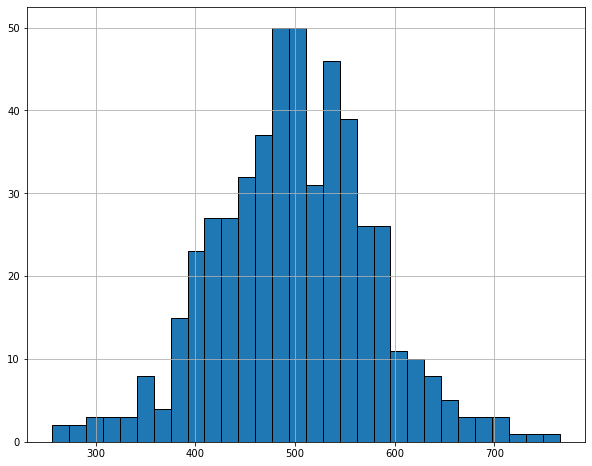

In [257]:
#visualizing the variable
cust['Yearly Amount Spent'].hist(bins=30, edgecolor='black', figsize=(10,8))
plt.show()

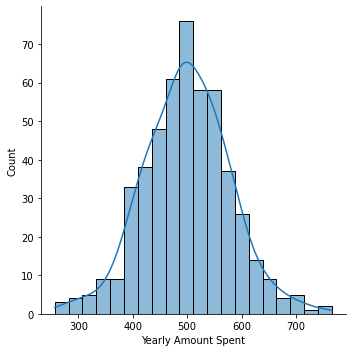

In [258]:
#Checking distribution
sns.displot(cust, x='Yearly Amount Spent', kde=True)

/Users/rimahinnawi/opt/anaconda3/envs/MLProject/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


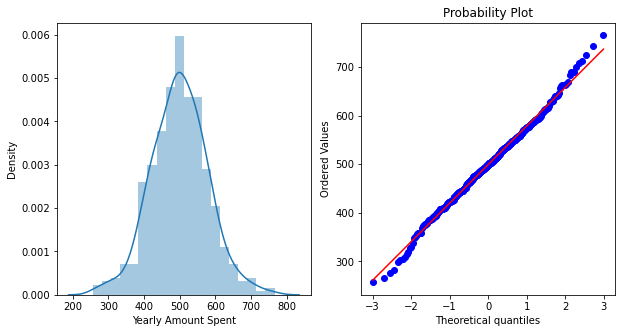

In [259]:
# checking distribution in more detail... 
from scipy import stats
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(cust['Yearly Amount Spent'], ax=axs[0])
res = stats.probplot(cust['Yearly Amount Spent'], plot=plt)
plt.show()

## Observations:
- Based on above plots and on plots above, 'Yearly Amount Spent' is definitely normally distributed. 

#### Check correlation among variables

Explore the relation between each indipendent variable and the dependent variable using multiple plots, among them also **jointplot** plots. 
    

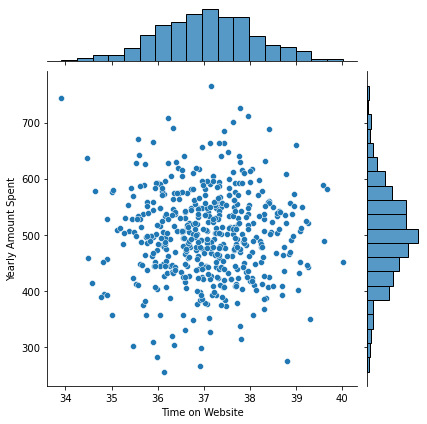

In [260]:
#We can visualize features to understand the data
# Lets start with "time on website" relationship with amount spent

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=cust)

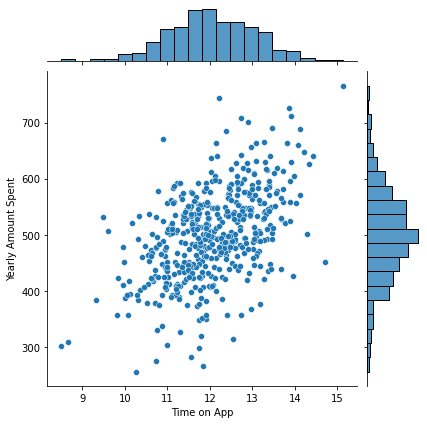

In [261]:
#Now check "time on app" and compare to amount spent
#It seems like  from the plot below that the time on app influences the amount spent. 
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=cust)


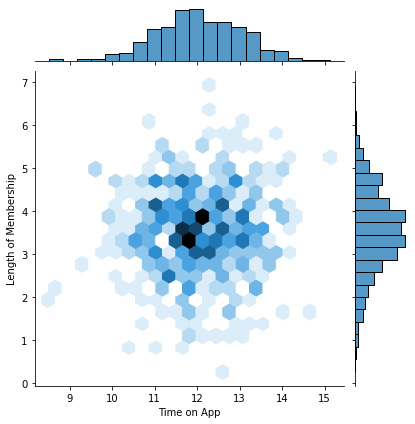

In [262]:
#using Hex plot to show the time on app influencing Membership
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = customers, kind = 'hex')

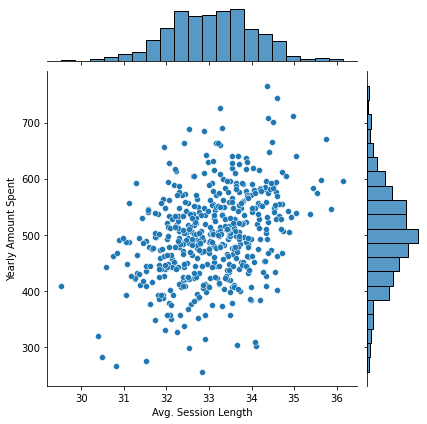

In [263]:

sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=cust)

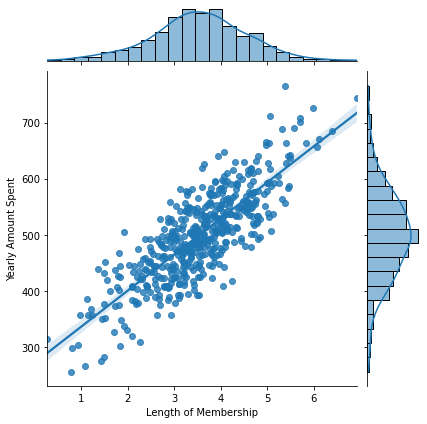

In [264]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=cust, kind="reg")

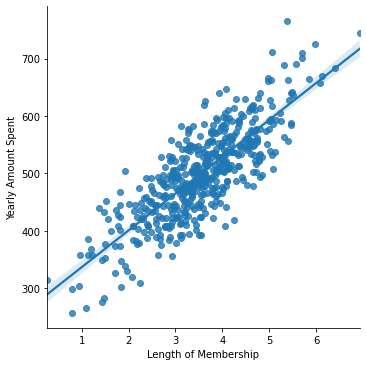

In [266]:

sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=cust)


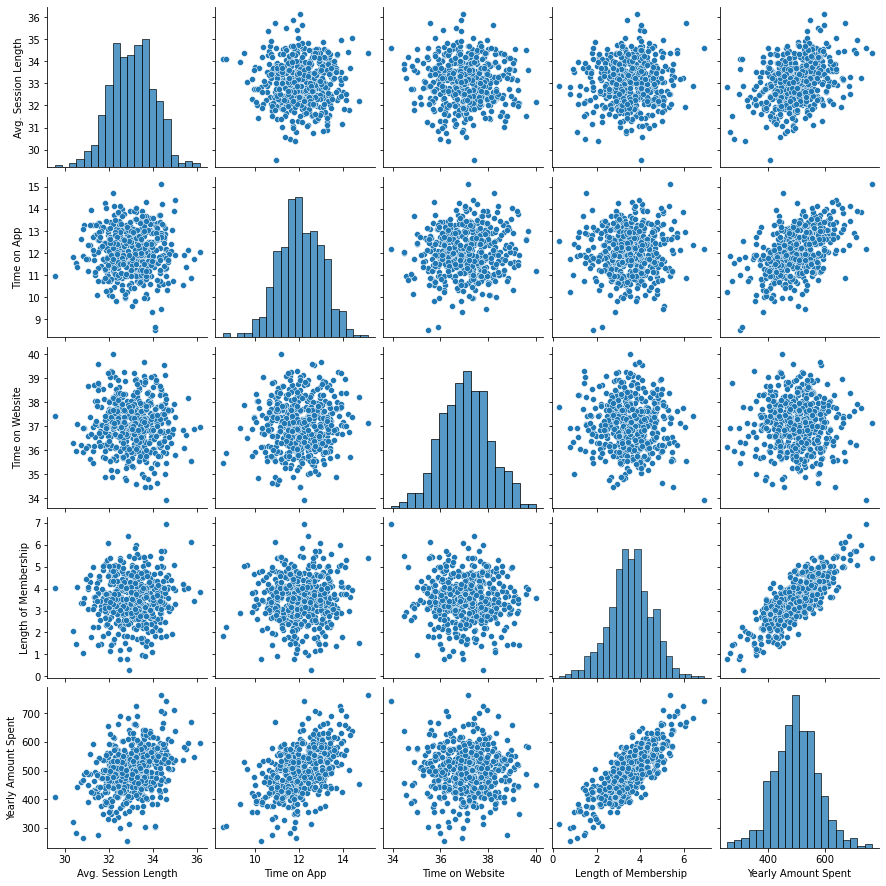

In [267]:
#Lets look at the relationships accross the dataset
#From pairplot below it seems like time on membership is the most important
sns.pairplot(cust)

## Observations:
- Based on the above plots,  we see that there is a definite relationship between "Length of Membership" 
and "Yearly Amount Spent"
- It also looks like there is some relationship between "Time on App" and "Yearly Amount Spent'but not as strong as the "Length of Membership" relationship.

### We can  now check correlation matrix  between the variables. This will be more of an indicator on the relationships between the various variables. 

In [270]:

corr_matrix = cust.corr()
corr_matrix['Yearly Amount Spent'].sort_values(ascending=False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64

<AxesSubplot:>

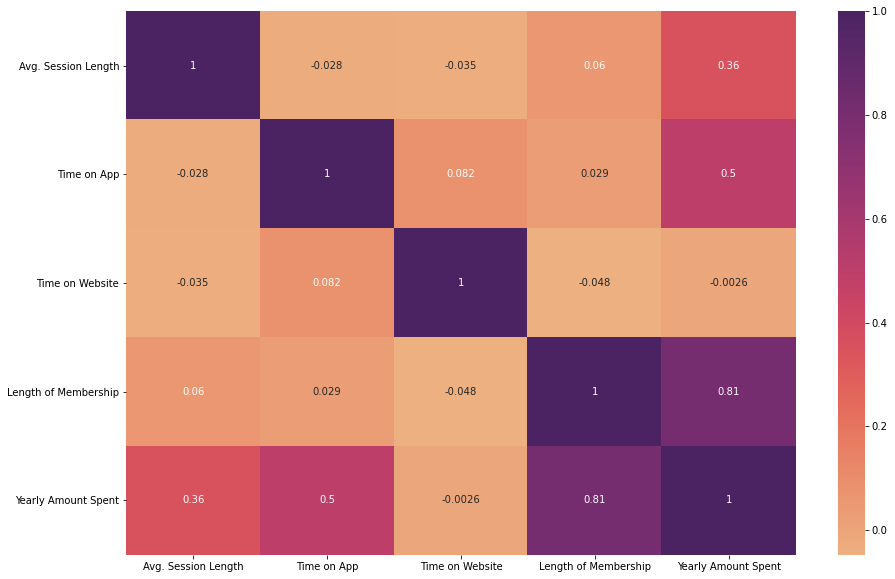

In [271]:
#now we can plot correlation with heatmat
plt.figure(figsize=(15,10)) 
sns.heatmap(cust.corr(),cmap = 'flare', annot=True)

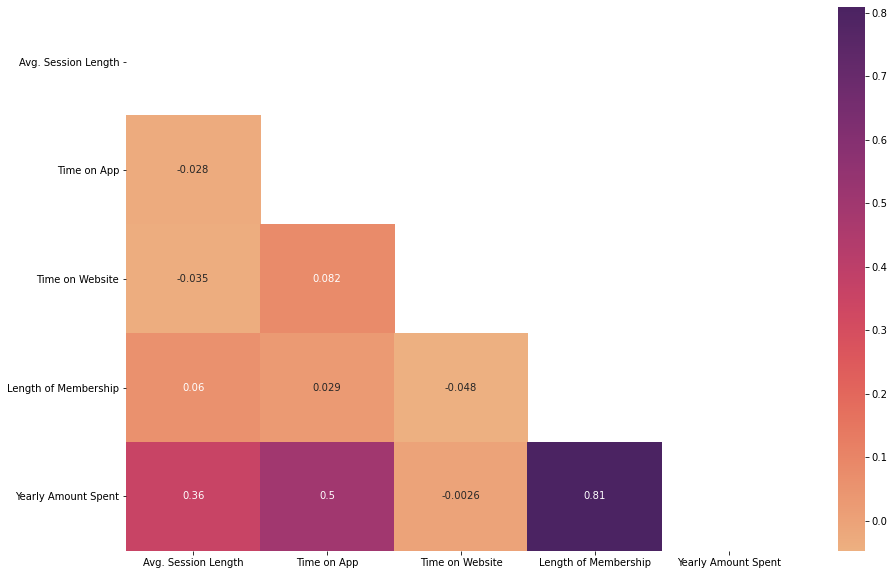

In [272]:
#below is another way to view it
plt.figure(figsize=(15,10)) 
matrix = np.triu(cust.corr())
sns.heatmap(cust.corr(), annot=True,mask=matrix, cmap = 'flare')
plt.show()

## Observations: 
- Based on feature analysis above it looks like there is definitely a correlation between the length of membership and Yearly amount spent
- Amount spent on app seems to influence yearly spending
- Amount spent on website  does not look like it is influencing spending


## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression model

### From the analysis above in the correlation matrix,  it looks like 'length of membership' is what is most important. 

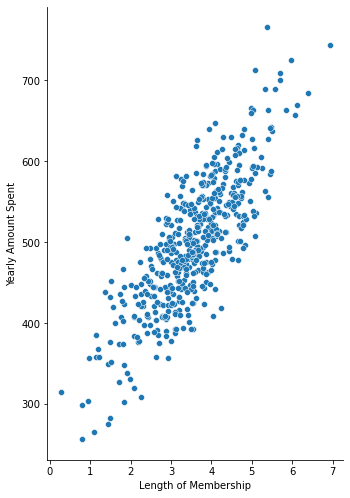

In [273]:
# Here is the visualization again
sns.pairplot(cust, x_vars=['Length of Membership'], y_vars='Yearly Amount Spent', height=7, aspect=0.7)

In [274]:
# Create feature matrix X
X = cust[['Length of Membership']]

# Create y - the possible result of X
y = cust['Yearly Amount Spent']

X.shape, y.shape

((500, 1), (500,))

### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [275]:


#below is the necessary code to to train the model with 75% of the samples and test with 25% of the samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [276]:
print("Training Data:", X_train.shape, y_train.shape)

Training Data: (375, 1) (375,)


In [277]:
print("Test Data:", X_test.shape, y_test.shape)

Test Data: (125, 1) (125,)


### Training of the model

In [278]:

#using linear regression 
from sklearn.linear_model import LinearRegression

model = LinearRegression()


#fitting/building model
model.fit(X_train,y_train)


LinearRegression()

#### Print the coeficients of the model

In [279]:

# we have one independent in this model so only one coefficient will be printed 
#That coefficient is for 'Length of Membership'

print('Coeficient: ', model.coef_)


Coeficient:  [65.14793731]


In [280]:
#printing intercept here
print('Intercept: ', model.intercept_)

Intercept:  269.6540359238166


In [143]:
# Based on the numbers above,
#Our Linear regression equation is: 'Yearly Amount Spent' = 65.15*'Length of Membership' + 269.65


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

In [281]:
#below is a table to compare train values  vs. predicted values and showing the difference
y_train_predict = model.predict(X_train)
diff_train = y_train_predict - y_train
df = pd.DataFrame({'Predicted Training Value':y_train_predict, 'Actual Training value ': y_train, "Difference" : diff_train})
df.head(15)

,Predicted Training Value,Actual Training value,Difference
111,512.171218,492.945053,19.226165
262,411.807941,376.496841,35.311100
317,456.692911,404.824529,51.868382
352,533.406117,532.127449,1.278668
470,466.575127,424.728774,41.846353
321,480.046101,542.412477,-62.366376
62,582.535515,613.599323,-31.063808
436,530.308561,583.079636,-52.771075
283,387.521612,374.269675,13.251937
339,452.329744,476.139247,-23.809503


Text(0.5, 1.0, 'Training Values vs. Predicted Values')

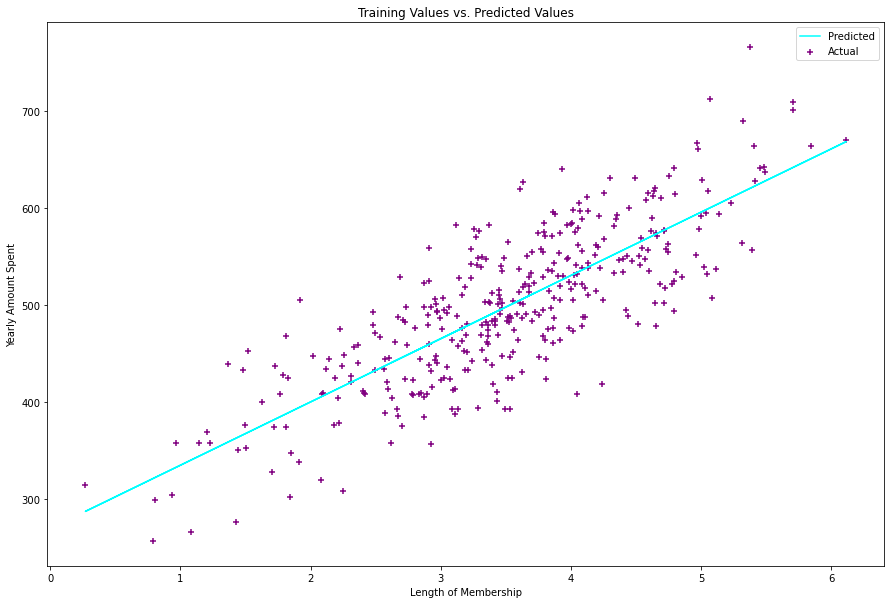

In [282]:
#Below is a plot to visualize the results
#scatterplot of the real training values versus the predicted values.
plt.figure(figsize=(15,10))

#here are the train input values with actual y outcome
plt.scatter(X_train, y_train, color='purple', marker= '+', label='Actual')

#here are the train input values with the predicted y outcome
plt.plot(X_train,model.predict(X_train), color='cyan', label='Predicted')
plt.legend()
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Training Values vs. Predicted Values')



## Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

In [284]:
#below is a table to compare test data vs. predicted

#y pred is predicted y based on test input variable data
y_pred= model.predict(X_test)

#difference between the actual value in the test data vs. the predicted value
diff_test_pred = y_test -y_pred
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, "Difference" : diff_test_pred})
df.head(15)

,Actual,Predicted,Difference
241,571.471034,549.642768,21.828266
448,478.584286,483.304498,-4.720212
75,478.719357,472.952664,5.766693
212,536.130897,520.072864,16.058032
481,497.389558,490.759802,6.629756
280,511.979860,470.722543,41.257317
474,492.556834,424.645962,67.910871
269,585.931844,504.583158,81.348686
40,532.751788,573.977997,-41.226209
222,502.409785,523.267886,-20.858101


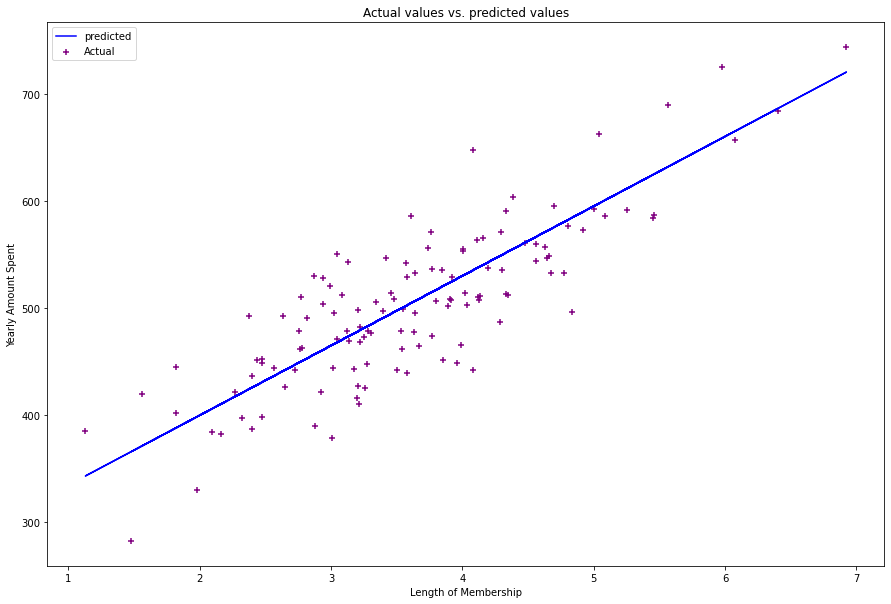

In [285]:
plt.figure(figsize=(15,10))

plt.scatter(X_test,y_test, color='purple', marker= '+', label='Actual')
plt.plot(X_test, model.predict(X_test),color="blue", label = 'predicted')
plt.legend()
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title("Actual values vs. predicted values")
plt.show()


Text(0, 0.5, 'Y Predicted')

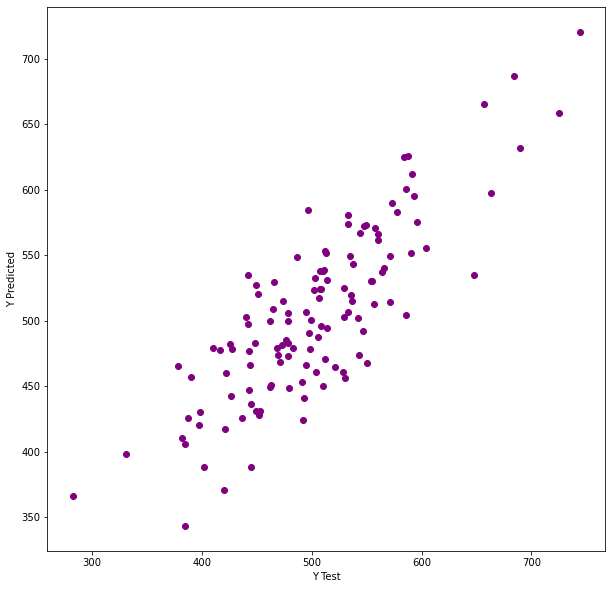

In [286]:
plt.figure(figsize=(10,10))

plt.scatter(y_test,y_pred, color='purple')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')


## Observations: 
- There is for sure a relationship between the predicted values and the train and test values
- based on the regression line, there is a positive relationship between the values 
- The plot shows that as X increases by a unit, y increases for a value equivalent to the coefficient value 65 that we calculated above


## Evaluation Metrics


The evaluation metrics aim to understand how accurate a model is. 


Let's evaluate our model performance by calculating: 

- The Mean Absolute Error (MAE):  If we have outliers in our data, we should use MAE, because we have an outlier it means there is much higher value and we make it square so may it hamper model performance
- Mean Squared Error (MSE): For each observation, it calculates he difference between the true value and the predicted value. We square it so that we dont have a negative values. It also gives more weight to larger differences. 
- The Root Mean Squared Error (RMSE): the same as MSE but take the root of it. Which shows the error level more closely. This brings the values to the same scale as target variable. The closer the number is to 0 the more accurate the model is.
- The R^2 score: R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. If r2 score is close to 1 then it is a good model. If it is close to 0 then it is not a good model. 

In [287]:

# Here is the manual way to calculate MSE
#The reason result is squared is because it needs to be positive
np.mean((y_test - y_pred)**2)

1744.646561976358

In [288]:
#here is manual way to calculate RMSE
np.sqrt(np.mean((y_test - y_pred)**2))

41.768966493993574

In [ ]:
#We see the results above have the same results as the python functions below... 

In [289]:
#Below are the same calculations using python sklearn metrics

from sklearn import metrics

MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred) 
RMSE=np.sqrt(MSE)
R2= metrics.r2_score(y_test, y_pred)

#print("Coefficient:", model.coef_)
#print("Intercept:", model.intercept_)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)

Mean Absolute Error: 34.03233090526607
Mean Squared Error: 1744.646561976358
RMSE: 41.768966493993574
R2: 0.6889559142164579


## Observations: 

- R2 score is at 0.6889 (about 69%)meaning there is a good fit between the actual data and the predicted values. Since a few of the actual values are not very close to the prediction line in the plot above, it makes sense that the r2 score is good enough but not good to the point for most points to be closer to the prediction line. 
- The RMSE value of 41.76 and the MAE value of 34.03 are good indicators (given that the mean of the target variable is around 500) that the predictions are close enough to the actual values. 


## Multivariate Model

In [290]:


## Add further cells in case you need
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

y = customers['Yearly Amount Spent']


### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [291]:

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25 ,random_state=5)


### Training of the model

In [293]:


lm=LinearRegression()

X_train.shape


(375, 4)

In [294]:
lm.fit(X_train,y_train)

LinearRegression()

#### Print the coeficients of the model

In [295]:

print('Coefficient for Avg. Session Length is:', lm.coef_[0])
print('Coefficient for Time on App is:', lm.coef_[1])
print('Coefficient for Time on Website is:', lm.coef_[2])
print('Coefficient for Length of Membership is:', lm.coef_[3])


Coefficient for Avg. Session Length is: 25.934335531530213
Coefficient for Time on App is: 38.48586385403809
Coefficient for Time on Website is: 0.49717599745364177
Coefficient for Length of Membership is: 61.78844721053217


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

In [296]:

#y pred is predicted y based on test input variable data
y_preds= lm.predict(X_test)

#difference between the actual value in the test data vs. the predicted value
diff_lm_test = y_test - y_pred
df_mult = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds, "Difference" : diff_lm_test})
df_mult.head(15)

,Actual,Predicted,Difference
241,571.471034,559.251174,21.828266
448,478.584286,478.555324,-4.720212
75,478.719357,455.906223,5.766693
212,536.130897,538.554882,16.058032
481,497.389558,480.568318,6.629756
280,511.979860,506.952109,41.257317
474,492.556834,499.557514,67.910871
269,585.931844,588.845682,81.348686
40,532.751788,532.230604,-41.226209
222,502.409785,519.380165,-20.858101


Text(0, 0.5, 'Y Predicted')

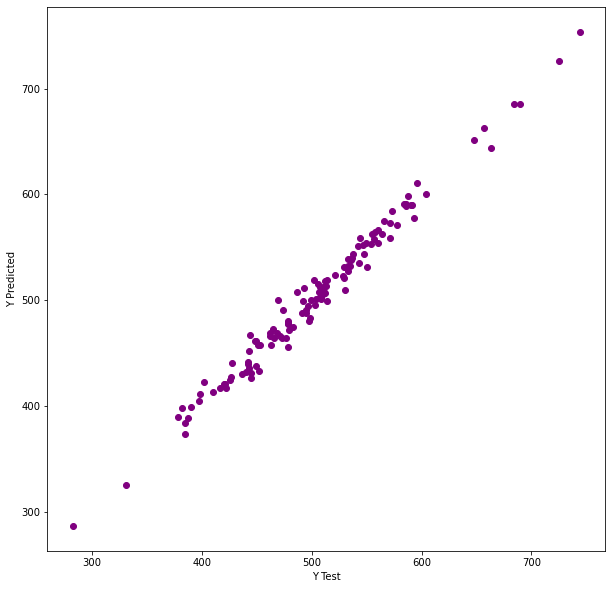

In [297]:
plt.figure(figsize=(10,10))

plt.scatter(y_test,y_preds, color='purple')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')


#### Evalution Metrics

In [298]:
from sklearn import metrics

MAE=metrics.mean_absolute_error(y_test, y_preds)
MSE=metrics.mean_squared_error(y_test, y_preds) 
RMSE=np.sqrt(MSE)
R2= metrics.r2_score(y_test, y_preds)

print("Coefficient:", lm.coef_)
print("Intercept:", lm.intercept_)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)

Coefficient: [25.93433553 38.48586385  0.497176   61.78844721]
Intercept: -1058.3484370365186
Mean Absolute Error: 7.420869348688972
Mean Squared Error: 92.75754400896423
RMSE: 9.631071799595528
R2: 0.983462733309656


#### Which model has better performance?

Write your answer here:






## Observations:

- The multivariable model has a much better performance
- We can see the improved performance simply by looking at the scatter plot
- The improved performance can also be explained by the R2 value of 0.98 or 98% (compared to 0.68 or 69% in the previous model
- In addition the MAS and the RSME numbers are a lot smaller than the previous model. The smaller the numbers, the more accurate the model is 

**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customenr.**

In [300]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coefficient']
coeffecients

,Coefficient
Avg. Session Length,25.934336
Time on App,38.485864
Time on Website,0.497176
Length of Membership,61.788447


## Observations:

Based on the Coefficients and all the analysis above:
- Length of Membership has higher coefficient and therefore seems to be the most important factor
- The next important thing is the "Time on App" with a coefficient of 38.48 . That coefficient is a lot higher than the Time on Website Coefficient of 0.49. 
- Time spent on website seems to be insignificant
- Based on the numbers above, we conclude that the company should spend more time working on its app. The app usage is definitely related to the customer spending and it definitely influences spending. 








